# Feature Engineering


## 0. Why ?

Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like ML. Most ML algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables.     

Most ML algorithms require their input data to be presented as a vector or a matrix, and many assume that the data is distributed normally. In reality, more often than not we will receive data that is not in this format.      

Many datatypes to work with:      
Continuous: either int or floats       
Categorical: one of a limited set of values     
Ordinal: ranked values, often with no detail of distance between them      
Boolean: T/F      
Datetime: dates and times      



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_so = pd.read_csv("../Machine_Learning_basics/data/Combined_DS_v10.csv",index_col="SurveyDate", parse_dates=True)
df_so = df_so.reset_index()
df_so.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2018-02-28 20:20:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,2018-06-28 13:26:00,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,2018-06-06 03:37:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,2018-05-09 01:06:00,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,2018-04-12 22:41:00,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [23]:
df_so.columns

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'Country',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary'],
      dtype='object')

In [24]:
df_so.dtypes

SurveyDate                    datetime64[ns]
FormalEducation                       object
ConvertedSalary                      float64
Hobby                                 object
Country                               object
StackOverflowJobsRecommend           float64
VersionControl                        object
Age                                    int64
Years Experience                       int64
Gender                                object
RawSalary                             object
dtype: object

In [27]:
# only cols with int
only_ints = df_so.select_dtypes(include=["int"])
print(only_ints)
print(only_ints.columns)

     Age  Years Experience
0     21                13
1     38                 9
2     45                11
3     46                12
4     39                 7
..   ...               ...
994   45                10
995   27                16
996   54                16
997   23                 9
998   18                 7

[999 rows x 2 columns]
Index(['Age', 'Years Experience'], dtype='object')


## 1. Categorical data

Categorical variables are used to represent groups that are qualitative in nature.     
Given a list of categorical label, we might assigning every category a number, but these categories labels are unordered, so assigning this order (the numbers) may penalise the effectiveness of the model. Instead, values can be encoded by creating additional binary features corresponding to whether each value was picked or not.       

Two main approach when representing categorical columns:     
1) one-hot encoding      
2) dummy encoding      

One-hot encoding converts n categories into n features. Can use get_dummies(). This function takes a DG and a list of categorical columns you want to convert, and returns an updated DataFrame with these columns included.       

Dummy encoding creates n-1 features for n category, omitting the first category. (you only need n-1 col to uniquely define the labels).       

One-hot encoding: Explainable features. But may create features that are entirely collinear due to same info being represented multiple times.       

Dummy encoding: necessary info w/o duplicaiton.       

Both of these method may result in a huge number of columns if there are too mamy category in a column. We may only want to create columns for the most common values.

In [28]:
#one-hot encoding
pd.get_dummies(df_so,columns=["Country"],prefix='C')

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,C_France,C_India,C_Ireland,C_Russia,C_South Africa,C_Spain,C_Sweeden,C_UK,C_USA,C_Ukraine
0,2018-02-28 20:20:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,2018-06-28 13:26:00,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0
2,2018-06-06 03:37:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,2018-05-09 01:06:00,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,1,0,0,0
4,2018-04-12 22:41:00,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2018-10-19 13:50:00,Some college/university study without earning ...,NaN,Yes,NaN,Subversion,45,10,Male,NaN,1,0,0,0,0,0,0,0,0,0
995,2018-04-14 15:31:00,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,8.0,Git,27,16,Male,"58,746.00",0,0,0,0,0,1,0,0,0,0
996,2018-03-21 06:34:00,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,NaN,Git,54,16,Male,"$55,000.00",0,0,0,0,0,0,0,0,1,0
997,2018-02-05 20:01:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git;Subversion,23,9,NaN,NaN,0,0,0,0,0,0,1,0,0,0


In [30]:
pd.get_dummies(df_so,columns=["Country"],drop_first=True,prefix="C")

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,C_India,C_Ireland,C_Russia,C_South Africa,C_Spain,C_Sweeden,C_UK,C_USA,C_Ukraine
0,2018-02-28 20:20:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,1,0,0,0,0,0
1,2018-06-28 13:26:00,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,1,0,0,0
2,2018-06-06 03:37:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,1,0,0,0
3,2018-05-09 01:06:00,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,1,0,0,0
4,2018-04-12 22:41:00,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2018-10-19 13:50:00,Some college/university study without earning ...,NaN,Yes,NaN,Subversion,45,10,Male,NaN,0,0,0,0,0,0,0,0,0
995,2018-04-14 15:31:00,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,8.0,Git,27,16,Male,"58,746.00",0,0,0,0,1,0,0,0,0
996,2018-03-21 06:34:00,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,NaN,Git,54,16,Male,"$55,000.00",0,0,0,0,0,0,0,1,0
997,2018-02-05 20:01:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git;Subversion,23,9,NaN,NaN,0,0,0,0,0,1,0,0,0


In [33]:
# no. of occurancs
counts = df_so["Country"].value_counts()
print(counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [39]:
# create a mask (bool) of the values that occur less than n times
mask = df_so["Country"].isin(counts[counts<100].index)

df_so["Country"][mask] = "Other"

print(df_so["Country"].value_counts())

Other           301
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Name: Country, dtype: int64


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
pd.get_dummies(df_so,columns=["Country"],prefix='C')

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,C_France,C_Other,C_South Africa,C_Spain,C_Sweeden,C_USA
0,2018-02-28 20:20:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,1,0,0,0
1,2018-06-28 13:26:00,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,1,0
2,2018-06-06 03:37:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,1,0
3,2018-05-09 01:06:00,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,1,0
4,2018-04-12 22:41:00,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2018-10-19 13:50:00,Some college/university study without earning ...,NaN,Yes,NaN,Subversion,45,10,Male,NaN,1,0,0,0,0,0
995,2018-04-14 15:31:00,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,8.0,Git,27,16,Male,"58,746.00",0,0,0,1,0,0
996,2018-03-21 06:34:00,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,NaN,Git,54,16,Male,"$55,000.00",0,0,0,0,0,1
997,2018-02-05 20:01:00,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git;Subversion,23,9,NaN,NaN,0,0,0,0,1,0


## 2. Numerical features

One of the first questions we should ask when working with numeric features is whether the magnitude of the feature is ints most important trait, or just its direction. e.g. a dataset of restaurant health and sfety ratings containing the number of times a restaurant had major iolations, you might care far more about whether the restaurant had any major violations at all, over whether it was a repeated offender. We can create a new binary column representing whether or not a restaurant commited any violation.    

An extension of this is perhaps we wish to group a numeric variable into more than two bins. This often useful for variables such as age, wage brackets etc, where exact numbers are less relevant than the general magnitude of the value. For the same restaurant dataset, we can create 3 groups, G1: no offence, G2: 1 or 2 offence, G3: all with 3 or more offence.

In [44]:
df_rest_vio = pd.read_csv("../Machine_Learning_basics/data/rest_vio.csv")
df_rest_vio

,Resturant_ID,Number_of_Violations
0,RS_1,0
1,RS_2,0
2,RS_3,2
3,RS_4,1
4,RS_5,0
5,RS_6,0
6,RS_7,4
7,RS_8,4
8,RS_9,1
9,RS_10,0


In [43]:
df_rest_vio["Binary_Violation"] = 0 #create new col
df_rest_vio.loc[df_rest_vio["Number_of_Violations"]>0,"Binary_Violation"] = 1
df_rest_vio

,Resturant_ID,Number_of_Violations,Binary_Violation
0,RS_1,0,0
1,RS_2,0,0
2,RS_3,2,1
3,RS_4,1,1
4,RS_5,0,0
5,RS_6,0,0
6,RS_7,4,1
7,RS_8,4,1
8,RS_9,1,1
9,RS_10,0,0


In [45]:
# bins are created using the cut function
# bins can be an integer specifying the number of evenly spaced bins, or a list of bin boundaries
import numpy as np
# as we want to include 0 in the G1, we must set the left most edge to be less 0, so all value form -inf to 0 is labeled
# as G1
df_rest_vio["Binned_Group"] = pd.cut(df_rest_vio["Number_of_Violations"], bins=[-np.inf,0,2,np.inf],labels=[1,2,3])
df_rest_vio

,Resturant_ID,Number_of_Violations,Binned_Group
0,RS_1,0,1
1,RS_2,0,1
2,RS_3,2,2
3,RS_4,1,2
4,RS_5,0,1
5,RS_6,0,1
6,RS_7,4,3
7,RS_8,4,3
8,RS_9,1,2
9,RS_10,0,1


## 3. Dealing with missing data

Real world data often has noise or omissions: data not collecting properly, collected wrongly etc.        
Many ML cannot work with missing values. If data is consistently missing in a certain column, we should investigate as to why this is the case.        

Missing data may provide information itself, e.g. if no. of children of a person is missing they may have no children.     
Use .info() to have a check of missing values.      
Use isnull() to find where these missing value exist.      


In [3]:
# find where missing value exist
df_so.isnull()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,False,False,True,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,True,False,False,True,False,False,False,False,True
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,True,False,False,False,False,False
997,False,False,True,False,False,True,False,False,False,True,True


In [4]:
# count no. of missing value in a specific col
df_so["StackOverflowJobsRecommend"].isnull().sum()

512

In [5]:
df_so.notnull() #the reverse, find not null

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,True,True,False,True,True,False,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,True,True,True,True,True,False,False
3,True,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
994,True,True,False,True,True,False,True,True,True,True,False
995,True,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,False,True,True,True,True,True
997,True,True,False,True,True,False,True,True,True,False,False


### 3.1 Complete case analysis (listwise deletion)

In this method, a record is fully excluded from your model if any of its values are missing.      

Drawbacks:       
1) deletes perfectly valid data points that share a row with a missing value        
2) if the missing value do not occur entirely random, it can negatively affect the model        
3) if we were to remove a feature instead of a row, it can reduce the degree of freedom of our model       

The most common way to deal with missing values is to simply fill these values using .fillna() method.      
In the case of categorical col, it is common to replace missing values with strings like "Others", "Not given" etc.     

In situation where we believe that the absence of presence of data is more important than the value, we can create a new col that records the absence of data and then drop the original col.        



In [ ]:
# drop all rows with at least one missing values
df_so.dropna(how="any")
# drop rows with missing values in a specific col
# arg is a list of cols
df_so.dropna(subset=["VersionControl"])

In [ ]:
df_so["VersionControl"].fillna(value="None Given", inplace=True)

In [ ]:
# record where the values are missing in a new col
df_so["SalaryGiven"] = df_so["ConvertedSalary"].notnull()
# drop the old col
df_so.drop(columns=["ConvertedSalary"])

In [ ]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = df_so.dropna(how='any', axis=1)

### 3.2 Fill continuous missing values

While listwise deletion is often the most statistically sound method of dealing with missing values in cases where we believe the gaps are at random, this will often not be feasible in would use cases.       

Replacing these values !      

Categorical columns:     
Replace missing values with the most common occurring value or with a string that flags missing values as "None"      

Numeric columns:       
Replace missing values with a suitable value:      
Measure of central tendency: mean and median.     

These measures can lead to biased estimates of the variances and covariances of the features. Similarly, standard error and test statistics can be incorretly estimated. If these metrics are needed, they should be calculated before the missing values have been filled.      

Missing values are exclued by default when using pandas .mean() and .median()      



In [6]:
# get mean and median of a col
df_so["ConvertedSalary"].mean()

92565.16992481203

In [7]:
df_so["ConvertedSalary"].median()

55562.0

In [ ]:
# fill na values with mean
df_so["ConvertedSalary"] = df_so["ConvertedSalary"].fillna(df["ConvertedSalary"].mean())
# decimal place control
df_so["ConvertedSalary"] = df_so["ConvertedSalary"].astype("int64")
# or round the mean before filling the missing value
df_so["ConvertedSalary"] = df_so["ConvertedSalary"].fillna(round(df["ConvertedSalary"].mean()))

### 3.3 Dealing with other data issues

clean-up data such as dollar sign in currency columns.      

to_numeric() function from pd, with error arg = coerce, pd will convert the col to numeric, but all values that cannot be converted to numeric will changed to NaNs.     



In [8]:
df_so["RawSalary"].dtype
# object ! should be numerical

dtype('O')

In [9]:
df_so["RawSalary"].head()
# commas !

0           NaN
1     70,841.00
2           NaN
3     21,426.00
4    £41,671.00
Name: RawSalary, dtype: object

In [3]:
df_so["RawSalary"]=df_so["RawSalary"].str.replace(",","")
df_so["RawSalary"]=df_so["RawSalary"].str.replace("$","")
df_so["RawSalary"]=df_so["RawSalary"].str.replace("£","")
df_so["RawSalary"]
# remove all comma

0             NaN
1        70841.00
2             NaN
3        21426.00
4        41671.00
          ...    
994           NaN
995      58746.00
996      55000.00
997           NaN
998    1000000.00
Name: RawSalary, Length: 999, dtype: object

In [20]:
df_so["coerced_vals"] = pd.to_numeric(df_so["RawSalary"], errors="coerce")

In [21]:
df_so["coerced_vals"]

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: coerced_vals, Length: 999, dtype: float64

## 4. Data distribution

A lot of algorithms make assumptions about how data is distributed or how different features interact with each other. For example, almost all models besides tree based models require your features to be on the same scale. Feature engineering can be used to manipulate your data so that it can fit the assumptions of the distribution, or at least fit it as closely as possible.     

Almost every model besides tree based models assume that our data is normally distributed.      
68.27% of the data lies within 1 standard deviation of the mean.     
95.45% of the data lies within 2 standard deviation of the mean.     
99.73% of the data lies within 3 standard deviation of the mean.     



In [11]:
df_so_numeric = df_so[["ConvertedSalary","Age","Years Experience"]]

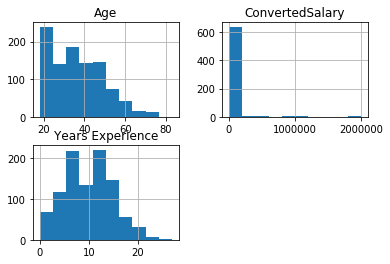

In [12]:
df_so_numeric.hist()
plt.show()

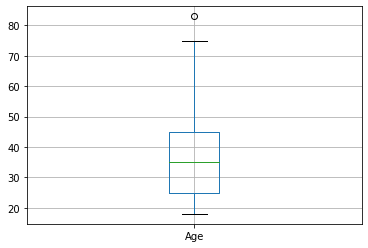

In [13]:
df_so_numeric[["Age"]].boxplot()
plt.show()

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


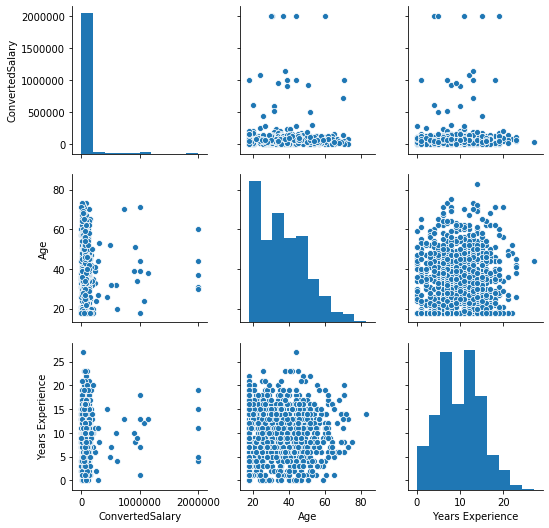

In [14]:
# pair distribution
sns.pairplot(df_so_numeric)

## 5. Scaling data

Most common technique:      
1) Min-Max scaling (or normalisation)        
Min-max scaling is when your data is scaled linearly between a minimum and maximum (like the "Age" showing on top) value, often it is 0 and 1. As it is a linear scaling while the values will change, the distribution will not. Note that as this scaler (sklearn's MinMaxscaler) assumes the max value it is created with is our upper bound, new data from outside this range may create unforeseen results.     

2) Standardisation       
Finds the mean of data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is.        
These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to max and min values.       

*log transformation*:           
Both normalisation and MinMax scaling are types of scalers, i.e. the data remained in the same shape but was squashed or scaled. A log transformation can be used to make highly skewed distribution less skewed. (e.g. "ConvertedSalary" from top)      


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_so_numeric[["Age"]])
df_so_numeric["normalise_age"] = scaler.transform(df_so_numeric[["Age"]])
df_so_numeric.head()

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ConvertedSalary,Age,Years Experience,normalise_age
0,NaN,21,13,0.046154
1,70841.0,38,9,0.307692
2,NaN,45,11,0.415385
3,21426.0,46,12,0.430769
4,41671.0,39,7,0.323077


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_so_numeric[["Age"]])
df_so_numeric["standardised_age"] = scaler.transform(df_so_numeric[["Age"]])
df_so_numeric.head()

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ConvertedSalary,Age,Years Experience,normalise_age,standardised_age
0,NaN,21,13,0.046154,-1.132431
1,70841.0,38,9,0.307692,0.150734
2,NaN,45,11,0.415385,0.679096
3,21426.0,46,12,0.430769,0.754576
4,41671.0,39,7,0.323077,0.226214


In [17]:
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()
log.fit(df_so_numeric[["ConvertedSalary"]])
df_so_numeric["log_ConvertedSalary"] = log.transform(df_so_numeric[["ConvertedSalary"]])
df_so_numeric.head()

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ConvertedSalary,Age,Years Experience,normalise_age,standardised_age,log_ConvertedSalary
0,NaN,21,13,0.046154,-1.132431,NaN
1,70841.0,38,9,0.307692,0.150734,0.312939
2,NaN,45,11,0.415385,0.679096,NaN
3,21426.0,46,12,0.430769,0.754576,-0.652182
4,41671.0,39,7,0.323077,0.226214,-0.135589


## 6. Removing outliers

First approach is to remove a certain percentage of the largest and/or smallest values in our data. e.g. remove top 5%. We can find the 95 percentile and remove everything above it. We must remember that even if there are no real outliers, we will still removing the top 5% of data.      

Second approach is to choose what we consider to be outliers based on the mean and standard deviations of the dataset. e.g. we may want to eliminate all data greater than 3 standard deviations from the mean. 

In [18]:
# based on percentile
q_cutoff = df_so_numeric["Age"].quantile(0.95)

mask = df_so_numeric["Age"] < q_cutoff

trimmed_df = df_so_numeric[mask]

trimmed_df.head()

,ConvertedSalary,Age,Years Experience,normalise_age,standardised_age,log_ConvertedSalary
0,NaN,21,13,0.046154,-1.132431,NaN
1,70841.0,38,9,0.307692,0.150734,0.312939
2,NaN,45,11,0.415385,0.679096,NaN
3,21426.0,46,12,0.430769,0.754576,-0.652182
4,41671.0,39,7,0.323077,0.226214,-0.135589


In [19]:
# based on stats
mean = df_so_numeric["Age"].mean()
std = df_so_numeric["Age"].std()

cut_off = std*3
lower,upper = mean-cut_off,mean+cut_off  

new_df = df_so_numeric[(df_so_numeric["Age"]<upper) & (df_so_numeric["Age"]>lower)]
new_df.head()

,ConvertedSalary,Age,Years Experience,normalise_age,standardised_age,log_ConvertedSalary
0,NaN,21,13,0.046154,-1.132431,NaN
1,70841.0,38,9,0.307692,0.150734,0.312939
2,NaN,45,11,0.415385,0.679096,NaN
3,21426.0,46,12,0.430769,0.754576,-0.652182
4,41671.0,39,7,0.323077,0.226214,-0.135589


## 7. Transforming new data (in test set or new data set)

We have to use the same transformation (instance) in new data set and training set.     
on training set, use .fit and .transform     
on test set, use .transform only      

If we want to remove outliers, we should use the threshold found on training set. Do not use those values on test set.      
Only in very rare cases, we want to remove outliers from test set.       

This is to avoid data leakage, which is using data that we will not have access to when assessing the performance of the model.     
